### Name: Solongo Manlaibaatar
### Student number : 2025076
### Integrated CA2

### Load  the data

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv("ECommerce.csv")
df.head()

,product_name,website,country,category,subcategory,title-href,price,brand,ingredients,form,type,color,size,rating,noofratings
0,"Carlton London Incense Eau da parfum, Premium ...",Flipkart,India,body,perfume,https://www.amazon.in/Carlton-London-Limited-I...,599.0,Carlton London,NaN,aerosol,NaN,"Top Note: Orange Blossom, Blackberry | Heart N...",100,3.9,19
1,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,149.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,031"
2,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,298.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,072"
3,DENVER Black Code Perfume - 60 | Eau de Parfum...,Flipkart,India,body,perfume,https://www.amazon.in/DENVER-Black-Code-Perfum...,245.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,60,4.2,61
4,Denver Hamilton Perfume - 100 | Long Lasting P...,Flipkart,India,body,perfume,https://www.amazon.in/Denver-Perfume-Hamilton-...,422.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,100,4.3,342


In [95]:
df.shape


(12615, 15)

In [97]:
df.describe()

,price
count,12298.000000
mean,2281.180935
std,3158.690307
min,1.700000
25%,499.000000
50%,1307.200000
75%,2859.500000
max,94099.000000


In [99]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12615 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12615 non-null  object 
 1   website       12615 non-null  object 
 2   country       12615 non-null  object 
 3   category      12615 non-null  object 
 4   subcategory   12615 non-null  object 
 5   title-href    12615 non-null  object 
 6   price         12298 non-null  float64
 7   brand         12615 non-null  object 
 8   ingredients   6600 non-null   object 
 9   form          12615 non-null  object 
 10  type          9934 non-null   object 
 11  color         10626 non-null  object 
 12  size          9449 non-null   object 
 13  rating        10548 non-null  object 
 14  noofratings   12156 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.4+ MB


In [101]:
df.isnull().sum()

product_name       0
website            0
country            0
category           0
subcategory        0
title-href         0
price            317
brand              0
ingredients     6015
form               0
type            2681
color           1989
size            3166
rating          2067
noofratings      459
dtype: int64

In [103]:
df.duplicated().sum()

60

### Data cleaning

In [106]:
df.replace('NAN', pd.NA, inplace=True)
df = df.dropna()

In [108]:
df.isnull().sum()


product_name    0
website         0
country         0
category        0
subcategory     0
title-href      0
price           0
brand           0
ingredients     0
form            0
type            0
color           0
size            0
rating          0
noofratings     0
dtype: int64

In [110]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

print("Duplicates after cleaning:", df.duplicated().sum())



Duplicates after cleaning: 0


In [112]:
### EDA analysis

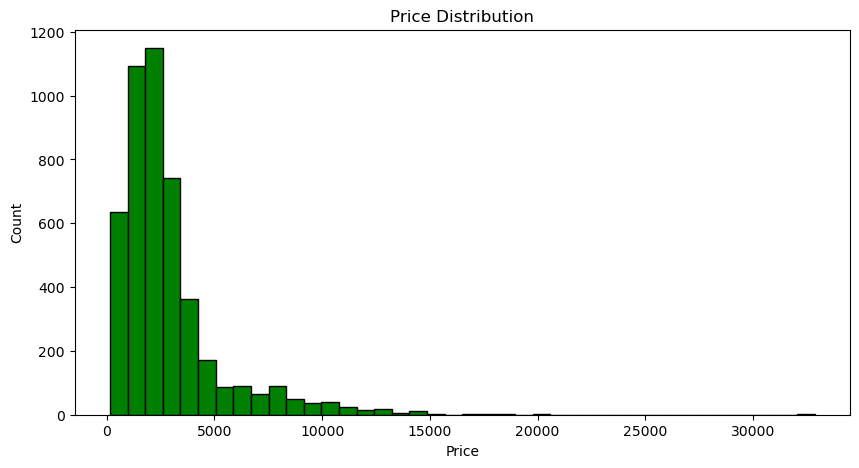

In [114]:
plt.figure(figsize=(10,5))
plt.hist(df['price'].dropna(), bins=40, color='green', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()

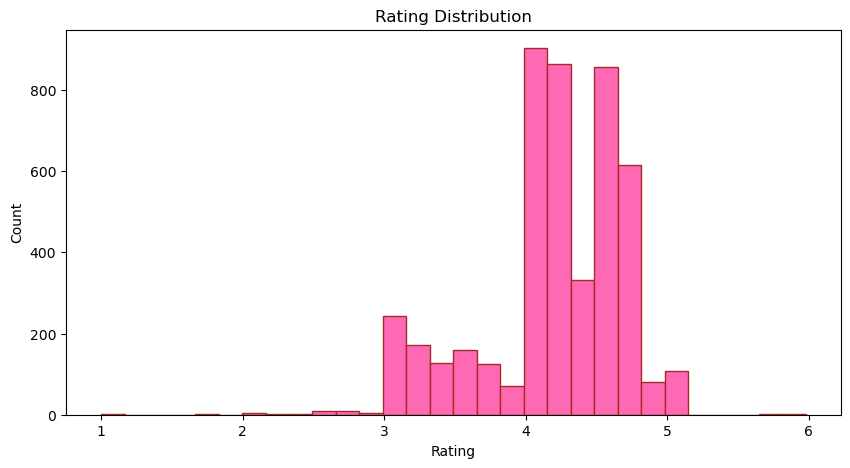

In [116]:
df['rating_num'] = pd.to_numeric(df['rating'], errors='coerce')
plt.figure(figsize=(10,5))
plt.hist(df['rating_num'].dropna(), bins=30, color= 'hotpink', edgecolor='brown')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

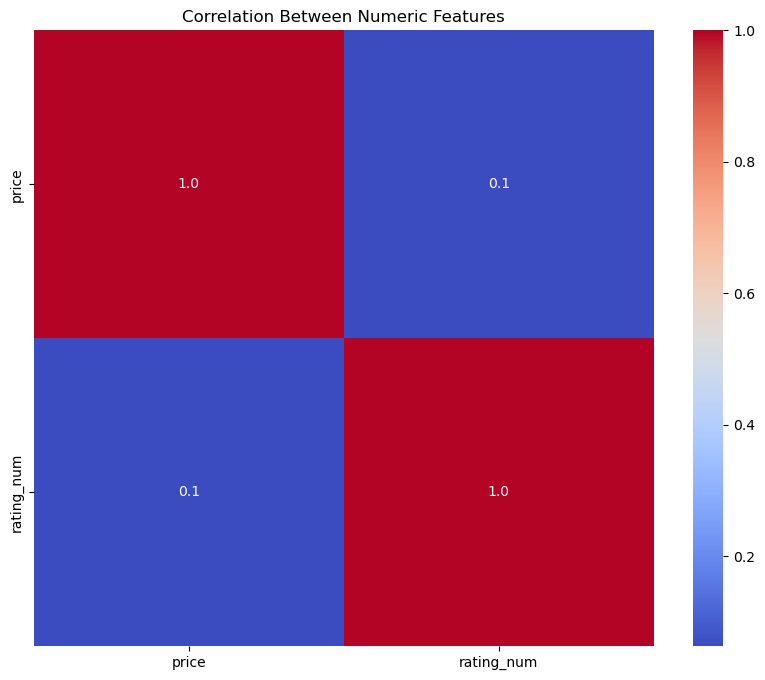

In [118]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

### What are the top 10 brand?

In [121]:
top10_brands = df['brand'].value_counts().head(10)

print(top10_brands)

brand
Sephora Collection         302
Anastasia Beverly Hills    126
Too Faced                  113
Smashbox                    95
Benefit Cosmetics           90
MAC Cosmetics               86
HUDA BEAUTY                 84
Dior                        81
Clinique                    81
SHISEIDO                    78
Name: count, dtype: int64


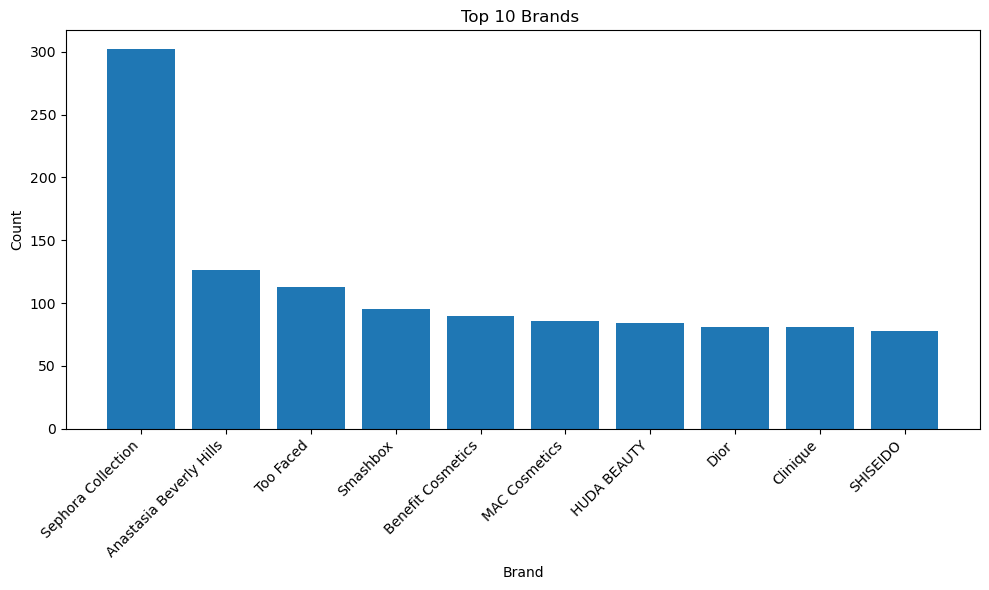

In [123]:
plt.figure(figsize=(10,6))
plt.bar(top10_brands.index, top10_brands.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Top 10 Brands ")
plt.tight_layout()
plt.show()

In [125]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Correlation
corr = df[['price', 'rating']].corr()
print(corr)

           price    rating
price   1.000000  0.063229
rating  0.063229  1.000000


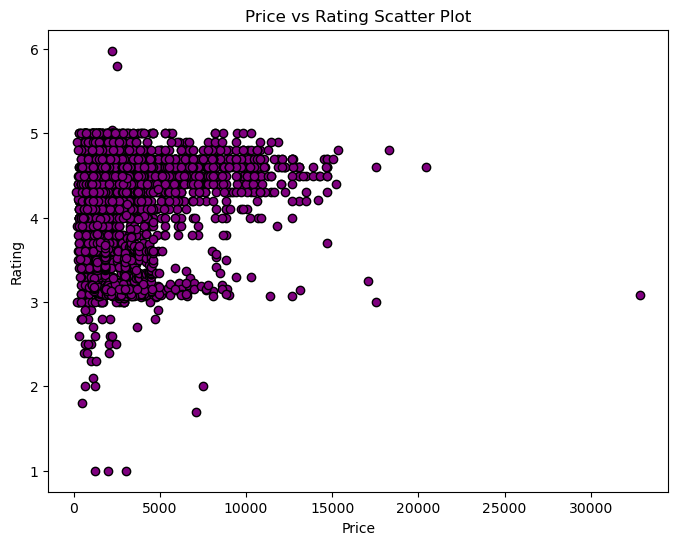

In [127]:
plt.figure(figsize=(8,6))
plt.scatter(df['price'], df['rating'], color='purple', edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Price vs Rating Scatter Plot")
plt.show()

## Best 5 Categories Based on Average Rating:

In [130]:

best5_avg_rating = (
    df.groupby('category')['rating_num']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

print("Best 5 Categories by Average Rating:")
print(best5_avg_rating)

Best 5 Categories by Average Rating:
category
skincare    4.448279
body        4.417076
hair        4.351345
lips        4.228129
eyes        4.121476
Name: rating_num, dtype: float64


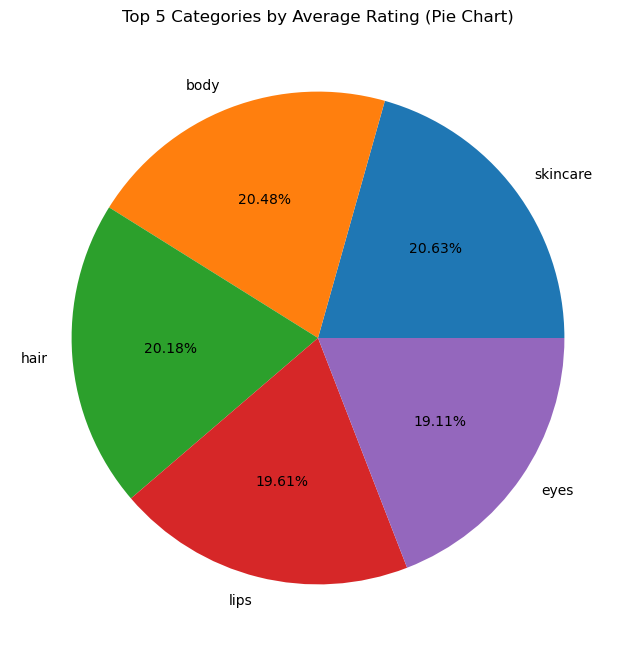

In [132]:
plt.figure(figsize=(8,8))
plt.pie(
    best5_avg_rating.values,
    labels=best5_avg_rating.index,
    autopct='%1.2f%%'
)
plt.title("Top 5 Categories by Average Rating (Pie Chart)")
plt.show()

### Price Comparison Across Best 5 Categories

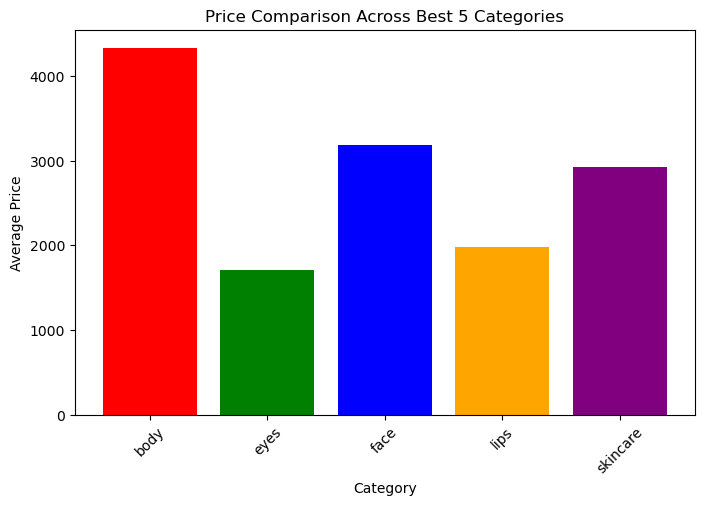

In [145]:
df['price_num'] = pd.to_numeric(df['price'], errors='coerce')


top5_categories = df['category'].value_counts().head(5).index

avg_price = (
    df[df['category'].isin(top5_categories)]
    .groupby('category')['price_num']
    .mean()
)
colors = ['red', 'green', 'blue', 'orange', 'purple']


plt.figure(figsize=(8,5))
plt.bar(avg_price.index, avg_price.values, color=colors)
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.title("Price Comparison Across Best 5 Categories")
plt.xticks(rotation=45)
plt.show()

In [147]:
top5_subcat = df['subcategory'].value_counts().head(5)
print(top5_subcat)

subcategory
perfume     561
serum       424
bodywash    400
lipstick    376
blush       333
Name: count, dtype: int64


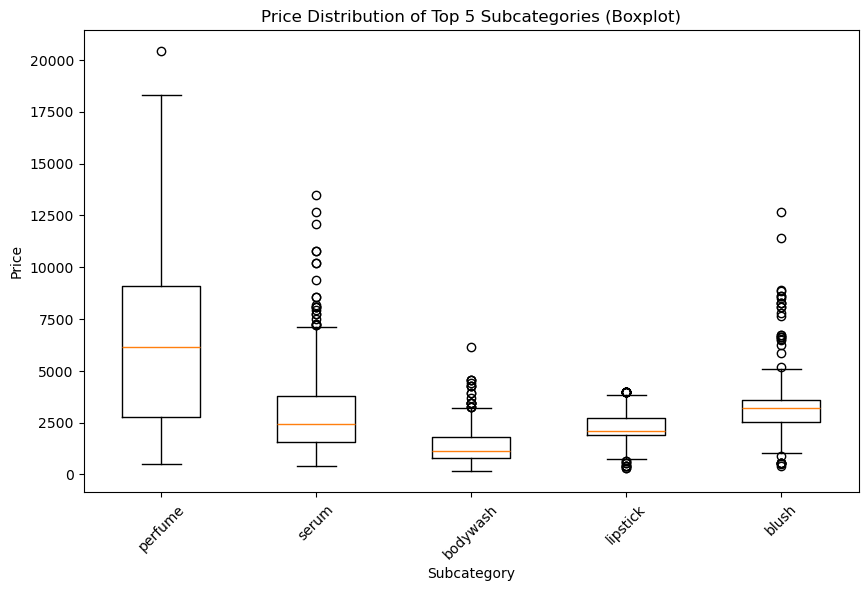

In [151]:
top5_subcat = df['subcategory'].value_counts().head(5).index
sub_df = df[df['subcategory'].isin(top5_subcat)].copy()

sub_df['price_num'] = pd.to_numeric(sub_df['price'], errors='coerce')

# Create boxplot
plt.figure(figsize=(10,6))
plt.boxplot([sub_df[sub_df['subcategory'] == sub]['price_num'].dropna() for sub in top5_subcat],
            labels=top5_subcat)

plt.title("Price Distribution of Top 5 Subcategories (Boxplot)")
plt.xlabel("Subcategory")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [83]:
product_count = df["country"].value_counts()
print("Product Count by Country:")
print(product_count)
print()

Product Count by Country:
country
USA      3072
India    1623
Name: count, dtype: int64



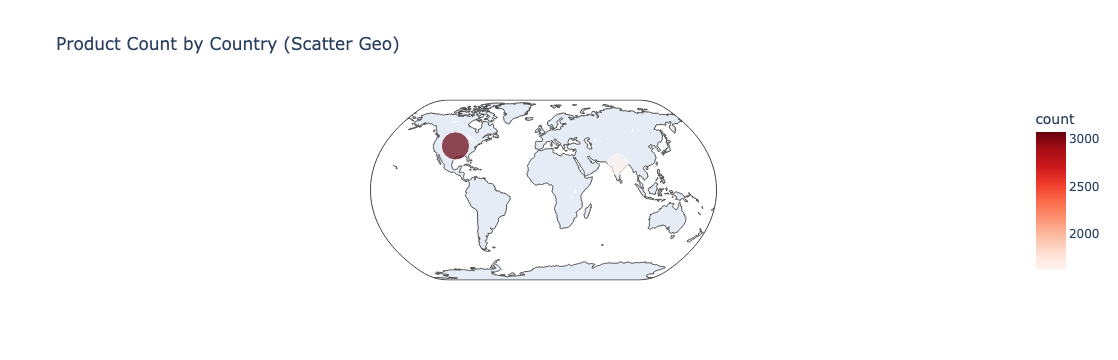

In [161]:
import plotly.express as px


df = pd.DataFrame({
    "country": ["USA", "India"],
    "count": [3072, 1623]
})

fig = px.scatter_geo(
    df,
    locations="country",
    locationmode="country names",
    size="count",
    color="count",
    color_continuous_scale="Reds",
    projection="natural earth",
    title="Product Count by Country (Scatter Geo)"
)

fig.show()

In [167]:
avg_price = df.groupby("country")["price"].mean()
print("Average Price by Country:")
print(avg_price)
print()

KeyError: 'Column not found: price'

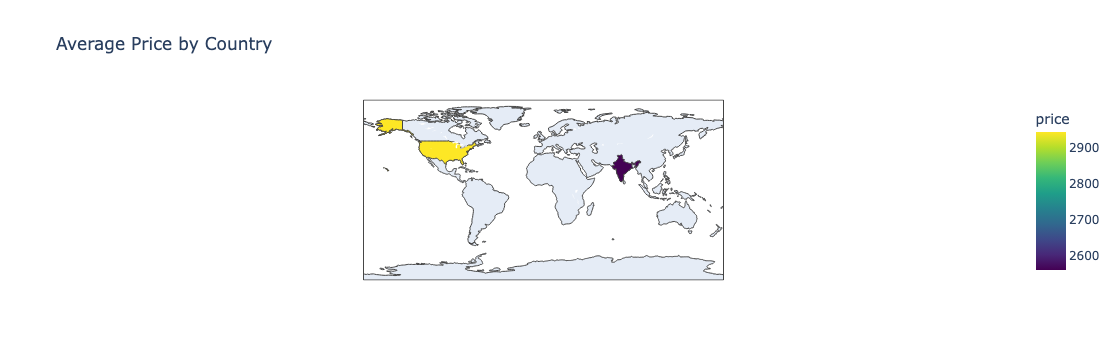

In [157]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    "country": ["India", "USA"],
    "price": [2559.256932, 2945.576566]
})

ig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="price",
    color_continuous_scale="Viridis",
    title="Average Price by Country"
)

ig.show()